<a href="https://colab.research.google.com/github/Akinab/planets/blob/main/planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing pyspark**

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0624e13bb96b81a6d5a065d471345090a5dcaeb868800ccd5918c39abe9d4fec
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


**Importing pyspark SQL Library**

In [178]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, corr, col, udf, struct
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import lit
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.appName("Exploring our Solar System").getOrCreate()

Read data from CSV file into **DataFrame**

In [204]:
df = spark.read.csv("/content/planets.csv", header=True, inferSchema=True)

In [101]:
# Show the schema to verify data types
df.printSchema()


root
 |-- Planet: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Mass (10^24kg): double (nullable = true)
 |-- Diameter (km): integer (nullable = true)
 |-- Density (kg/m^3): integer (nullable = true)
 |-- Surface Gravity(m/s^2): double (nullable = true)
 |-- Escape Velocity (km/s): double (nullable = true)
 |-- Rotation Period (hours): double (nullable = true)
 |-- Length of Day (hours): double (nullable = true)
 |-- Distance from Sun (10^6 km): double (nullable = true)
 |-- Perihelion (10^6 km): double (nullable = true)
 |-- Aphelion (10^6 km): double (nullable = true)
 |-- Orbital Period (days): string (nullable = true)
 |-- Orbital Velocity (km/s): double (nullable = true)
 |-- Orbital Inclination (degrees): double (nullable = true)
 |-- Orbital Eccentricity: double (nullable = true)
 |-- Obliquity to Orbit (degrees): double (nullable = true)
 |-- Mean Temperature (C): integer (nullable = true)
 |-- Surface Pressure (bars): string (nullable = true)
 |-- Number o

In [126]:
rdd = df.rdd

In [111]:
sc = spark.sparkContext.parallelize(data)

**Showing Dataset**

In [52]:
print(type(df))
df.show()

<class 'pyspark.sql.dataframe.DataFrame'>
+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------

In [61]:
df.head(8)

[Row(Planet='Mercury', Color='Grey', Mass (10^24kg)=0.33, Diameter (km)=4879, Density (kg/m^3)=5429, Surface Gravity(m/s^2)=3.7, Escape Velocity (km/s)=4.3, Rotation Period (hours)=1407.6, Length of Day (hours)=4222.6, Distance from Sun (10^6 km)=57.9, Perihelion (10^6 km)=46.0, Aphelion (10^6 km)=69.8, Orbital Period (days)='88', Orbital Velocity (km/s)=47.4, Orbital Inclination (degrees)=7.0, Orbital Eccentricity=0.206, Obliquity to Orbit (degrees)=0.034, Mean Temperature (C)=167, Surface Pressure (bars)='0', Number of Moons=0, Ring System?='No', Global Magnetic Field?='Yes'),
 Row(Planet='Venus', Color='Brown and Grey', Mass (10^24kg)=4.87, Diameter (km)=12104, Density (kg/m^3)=5243, Surface Gravity(m/s^2)=8.9, Escape Velocity (km/s)=10.4, Rotation Period (hours)=-5832.5, Length of Day (hours)=2802.0, Distance from Sun (10^6 km)=108.2, Perihelion (10^6 km)=107.5, Aphelion (10^6 km)=108.9, Orbital Period (days)='224.7', Orbital Velocity (km/s)=35.0, Orbital Inclination (degrees)=3.4,

**Filtering data of Planets with more than zero moons**

In [140]:
# Filter DataFrame to include only planets with more than 0 moons
filtered_df = df.filter(df['Number of Moons'] > 0)
filtered_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------------+-------------+----------------+----

In [90]:
# Filter DataFrame to include only planets with less than or equal to 100 Mass
filtered_df = df.filter(df['Mass (10^24kg)'] <= 100)
filtered_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------------+-------------+----------------+----

In [171]:
# Extracting specific columns: "Planet", "Color", "Length of Day (Hours)", "Number of Moons"
selected_columns_df = df.select("Planet", "Color", "Length of Day (hours)", "Number of Moons")

# Filter condition: planets with a length of day greater than 24 hours and with more than 1 moon
filtered_df = selected_columns_df.filter((selected_columns_df["Length of Day (hours)"] > 24) & (selected_columns_df["Number of Moons"] > 1))

# Displaying the filtered results
filtered_df.show()

+------+------------------+---------------------+---------------+
|Planet|             Color|Length of Day (hours)|Number of Moons|
+------+------------------+---------------------+---------------+
|  Mars|Red, Brown and Tan|                 24.7|              2|
+------+------------------+---------------------+---------------+



**Select**

In [167]:
# Extracting specific columns: "Planet", "Color", "Length of Day (Hours)", "Number of Moons"
selected_columns_df = df.select("Planet", "Color", "Length of Day (hours)", "Number of Moons")

# Displaying the first 5 rows of the selected columns
selected_columns_df.show(8)


+-------+--------------------+---------------------+---------------+
| Planet|               Color|Length of Day (hours)|Number of Moons|
+-------+--------------------+---------------------+---------------+
|Mercury|                Grey|               4222.6|              0|
|  Venus|      Brown and Grey|               2802.0|              0|
|  Earth|Blue, Brown Green...|                 24.0|              1|
|   Mars|  Red, Brown and Tan|                 24.7|              2|
|Jupiter|Brown, Orange and...|                  9.9|             79|
| Saturn|Golden, Brown, an...|                 10.7|             82|
| Uranus|          Blue-Green|                 17.2|             27|
|Neptune|                Blue|                 16.1|             14|
+-------+--------------------+---------------------+---------------+



**Defining values for mapping condition** (adding values)

In [174]:
# Define a function to extract specific columns: "Planet", "Color", "Length of Day (Hours)", "Number of Moons"
def extract_columns(row):
    return (row["Planet"], row["Color"], row["Length of Day (hours)"], row["Number of Moons"])

In [175]:
# Define the schema for the extracted columns
extracted_schema = StructType([
    StructField("Planet", StringType(), True),
    StructField("Color", StringType(), True),
    StructField("Length of Day (hours)", StringType(), True),
    StructField("Number of Moons", StringType(), True)
])

In [176]:
# Create a UDF from the extract_columns function
extract_columns_udf = udf(extract_columns, extracted_schema)

In [179]:
# Apply the UDF to the DataFrame to extract the specified columns
mapped_df = df.withColumn("Extracted Data", extract_columns_udf(struct([df[col] for col in df.columns])))

In [180]:
# Displaying the result
mapped_df.show(truncate=False)

+-------+-----------------------------------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+-------------------------------------------------------------------+
|Planet |Color                                          |Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of M

In [160]:
# Function to extract specific columns: "Planet", "Color", "Length of Day (Hours)", "Number of Moons"
def extract_columns(row):
    return (row[0], row[1], row[8], row[20])


In [162]:
# Apply the map function to extract these columns
mapped_rdd = rdd.map(extract_columns)

In [163]:
# Let's see the result
mapped_rdd.take(8)  # Displaying the first 5 rows

[('Mercury', 'Grey', 4222.6, 'No'),
 ('Venus', 'Brown and Grey', 2802.0, 'No'),
 ('Earth', 'Blue, Brown Green and White', 24.0, 'No'),
 ('Mars', 'Red, Brown and Tan', 24.7, 'No'),
 ('Jupiter', 'Brown, Orange and Tan, with White cloud stripes', 9.9, 'Yes'),
 ('Saturn', 'Golden, Brown, and Blue-Grey', 10.7, 'Yes'),
 ('Uranus', 'Blue-Green', 17.2, 'Yes'),
 ('Neptune', 'Blue', 16.1, 'Yes')]

In [91]:
def has_dense_atmosphere(row):
    if row['Surface Pressure (bars)'] == 'Unknown':
        return 'Unknown'
    elif float(row['Surface Pressure (bars)']) > 4:
        return 'Yes'
    else:
        return 'No'

In [92]:
# Apply the function using map and add the result as a new column
mapped_df = df.rdd.map(lambda row: row + (has_dense_atmosphere(row),)).toDF(df.columns + ['Dense Atmosphere'])

In [93]:
mapped_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+----------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|Dense Atmosphere|
+-------+--------------------+--------------+-

**Using rdd count()**

In [108]:
total_count = df.rdd.count()
print(f"Total number of rows: {total_count}")

Total number of rows: 8


In [182]:
# Calculate the total number of moons across all planets
total_moons = df.selectExpr("sum(`Number of Moons`)").collect()[0][0]

# Print the total number of moons
print(f"Total number of moons across all planets: {total_moons}")

Total number of moons across all planets: 205


In [183]:
# Filter the DataFrame to select only planets with rings
planets_with_rings_df = df.filter(df["Ring System?"] == "Yes")

# Calculate the total number of planets with rings
total_planets_with_rings = planets_with_rings_df.count()

# Print the total number of planets with rings
print(f"Total number of planets with rings: {total_planets_with_rings}")

Total number of planets with rings: 4


**Using rdd collect()**

In [114]:
# Collect RDD
rdd_collected = sc.collect()

# Print RDD
for columns in rdd_collected:
    print(columns)

planet
color
mass
diameter
density
surface_gravity
escape_velocity
rotation_period
lenght_of_day
istance_from_the_sun
perihelion
aphelion
orbital_period
orbital_velocity
orbital_inclination
orbital_eccentricity
obliquity_to_orbit
mean_temperature
surface_pressure
number_of_moons
ring_system
global_magnetic_field


In [222]:
# Collect RDD
rdd_collected = df.select("Color").rdd.map(lambda row: row[0]).collect()

# Print RDD
for color in rdd_collected:
    print(color)

Grey
Brown and Grey
Blue, Brown Green and White
Red, Brown and Tan
Brown, Orange and Tan, with White cloud stripes
Golden, Brown, and Blue-Grey
Blue-Green
Blue


**Using sortbyKey()**

In [221]:
# Convert mean temperature column to numeric type (if needed)
df = df.withColumn("Mean Temperature (C)", df["Mean Temperature (C)"].cast("float"))

# Sort the DataFrame by mean temperature
sorted_by_temperature_df = df.orderBy("Mean Temperature (C)")

# Show the sorted DataFrame
sorted_by_temperature_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------------+-------------+----------------+----

In [223]:
# Convert the DataFrame to an RDD and map each row to a key-value pair with the planet's name as the key
rdd_key_value = df.rdd.map(lambda row: (row["Planet"], row))

# Sort the RDD by the planet's name (key) in ascending order
sorted_rdd = rdd_key_value.sortByKey()

# Collect the sorted RDD and print the results
sorted_planets = sorted_rdd.collect()
for planet in sorted_planets:
    print(planet)

('Earth', Row(Planet='Earth', Color='Blue, Brown Green and White', Mass (10^24kg)=5.97, Diameter (km)=12756, Density (kg/m^3)=5514, Surface Gravity(m/s^2)=9.8, Escape Velocity (km/s)=11.2, Rotation Period (hours)=23.9, Length of Day (hours)=24.0, Distance from Sun (10^6 km)=149.6, Perihelion (10^6 km)=147.1, Aphelion (10^6 km)=152.1, Orbital Period (days)='365.2', Orbital Velocity (km/s)=29.8, Orbital Inclination (degrees)=0.0, Orbital Eccentricity=0.017, Obliquity to Orbit (degrees)=23.4, Mean Temperature (C)=15.0, Surface Pressure (bars)='1', Number of Moons=1, Ring System?='No', Global Magnetic Field?='Yes'))
('Jupiter', Row(Planet='Jupiter', Color='Brown, Orange and Tan, with White cloud stripes', Mass (10^24kg)=1898.0, Diameter (km)=142984, Density (kg/m^3)=1326, Surface Gravity(m/s^2)=23.1, Escape Velocity (km/s)=59.5, Rotation Period (hours)=9.9, Length of Day (hours)=9.9, Distance from Sun (10^6 km)=778.5, Perihelion (10^6 km)=740.6, Aphelion (10^6 km)=816.4, Orbital Period (da

**Using sortbyKey() in Dataframe format**

In [187]:
# Sort the DataFrame by the "Planet" column in ascending order
sorted_df = df.orderBy("Planet")

# Show the sorted DataFrame
sorted_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------------+-------------+----------------+----

**Using groupbyKey()**

In [224]:
# Convert the DataFrame to an RDD and map each row to a key-value pair with the color as the key
rdd_key_value = df.rdd.map(lambda row: (row["Color"], row))

# Group the RDD by the color (key)
grouped_rdd = rdd_key_value.groupByKey()

# Collect the grouped RDD and print the results
for color, planets in grouped_rdd.collect():
    print(f"Color: {color}")
    for planet in planets:
        print(f"- {planet}")
    print()

Color: Grey
- Row(Planet='Mercury', Color='Grey', Mass (10^24kg)=0.33, Diameter (km)=4879, Density (kg/m^3)=5429, Surface Gravity(m/s^2)=3.7, Escape Velocity (km/s)=4.3, Rotation Period (hours)=1407.6, Length of Day (hours)=4222.6, Distance from Sun (10^6 km)=57.9, Perihelion (10^6 km)=46.0, Aphelion (10^6 km)=69.8, Orbital Period (days)='88', Orbital Velocity (km/s)=47.4, Orbital Inclination (degrees)=7.0, Orbital Eccentricity=0.206, Obliquity to Orbit (degrees)=0.034, Mean Temperature (C)=167.0, Surface Pressure (bars)='0', Number of Moons=0, Ring System?='No', Global Magnetic Field?='Yes')

Color: Brown and Grey
- Row(Planet='Venus', Color='Brown and Grey', Mass (10^24kg)=4.87, Diameter (km)=12104, Density (kg/m^3)=5243, Surface Gravity(m/s^2)=8.9, Escape Velocity (km/s)=10.4, Rotation Period (hours)=-5832.5, Length of Day (hours)=2802.0, Distance from Sun (10^6 km)=108.2, Perihelion (10^6 km)=107.5, Aphelion (10^6 km)=108.9, Orbital Period (days)='224.7', Orbital Velocity (km/s)=35

**Using groupbyKey() in dataframe format**


In [202]:
# Group the DataFrame by the "Color" column and count the occurrences of each color
color_counts = df.groupBy("Color").count()

# Show the count of occurrences for each color
color_counts.show()

+--------------------+-----+
|               Color|count|
+--------------------+-----+
|Blue, Brown Green...|    1|
|  Red, Brown and Tan|    1|
|Golden, Brown, an...|    1|
|                Blue|    1|
|Brown, Orange and...|    1|
|                Grey|    1|
|          Blue-Green|    1|
|      Brown and Grey|    1|
+--------------------+-----+



**Using select()**

In [205]:
# Select specific columns: Let's select only the "Planet" and "Color" columns.
selected_df = df.select("Planet", "Color")

selected_df.show()

+-------+--------------------+
| Planet|               Color|
+-------+--------------------+
|Mercury|                Grey|
|  Venus|      Brown and Grey|
|  Earth|Blue, Brown Green...|
|   Mars|  Red, Brown and Tan|
|Jupiter|Brown, Orange and...|
| Saturn|Golden, Brown, an...|
| Uranus|          Blue-Green|
|Neptune|                Blue|
+-------+--------------------+



**Using filtered()**

In [206]:
# Filter rows: Let's filter planets with a diameter greater than 10,000 km.
filtered_df = df.filter(col("Diameter (km)") > 10000)

filtered_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------------+-------------+----------------+----

**Using orderby()**

In [208]:
# Order by: Let's sort the DataFrame by the "Mass (10^24kg)" column in descending order.
ordered_df = df.orderBy(col("Mass (10^24kg)").desc())

ordered_df.show()

+-------+--------------------+--------------+-------------+----------------+----------------------+----------------------+-----------------------+---------------------+---------------------------+--------------------+------------------+---------------------+-----------------------+-----------------------------+--------------------+----------------------------+--------------------+-----------------------+---------------+------------+----------------------+
| Planet|               Color|Mass (10^24kg)|Diameter (km)|Density (kg/m^3)|Surface Gravity(m/s^2)|Escape Velocity (km/s)|Rotation Period (hours)|Length of Day (hours)|Distance from Sun (10^6 km)|Perihelion (10^6 km)|Aphelion (10^6 km)|Orbital Period (days)|Orbital Velocity (km/s)|Orbital Inclination (degrees)|Orbital Eccentricity|Obliquity to Orbit (degrees)|Mean Temperature (C)|Surface Pressure (bars)|Number of Moons|Ring System?|Global Magnetic Field?|
+-------+--------------------+--------------+-------------+----------------+----

**Rename values**

In [227]:
# Define new column names
new_column_names = ["planet",
                    "color",
                    "mass",
                    "diameter",
                    "density",
                    "surface_gravity",
                    "escape_velocity",
                    "rotation_period",
                    "length_of_day",
                    "distance_from_sun",
                    "perihelion",
                    "aphelion",
                    "orbital_period",
                    "orbital_velocity",
                    "orbital_inclination",
                    "orbital_eccentricity",
                    "obliquity_to_orbit",
                    "new_mean_temperature",
                    "surface_pressure",
                    "number_of_moons",
                    "ring_system",
                    "global_magnetic_field"]

# Rename all columns using toDF() function
df = df.toDF(*new_column_names)

# Show the DataFrame with renamed columns
df.show()

+-------+--------------------+------+--------+-------+---------------+---------------+---------------+-------------+-----------------+----------+--------+--------------+----------------+-------------------+--------------------+------------------+--------------------+----------------+---------------+-----------+---------------------+
| planet|               color|  mass|diameter|density|surface_gravity|escape_velocity|rotation_period|length_of_day|distance_from_sun|perihelion|aphelion|orbital_period|orbital_velocity|orbital_inclination|orbital_eccentricity|obliquity_to_orbit|new_mean_temperature|surface_pressure|number_of_moons|ring_system|global_magnetic_field|
+-------+--------------------+------+--------+-------+---------------+---------------+---------------+-------------+-----------------+----------+--------+--------------+----------------+-------------------+--------------------+------------------+--------------------+----------------+---------------+-----------+------------------

**SQL Queries**

**1. What is the distribution of planet colors in the dataset, and are there any patterns or correlations with other attributes?**

In [212]:
# 1. Distribution of planet colors
color_distribution_query = """
SELECT Color, COUNT(*) AS Count
FROM planets
GROUP BY Color
ORDER BY Count
"""

color_distribution_result = spark.sql(color_distribution_query)
color_distribution_result.show()


+--------------------+-----+
|               Color|Count|
+--------------------+-----+
|Blue, Brown Green...|    1|
|  Red, Brown and Tan|    1|
|Golden, Brown, an...|    1|
|                Blue|    1|
|Brown, Orange and...|    1|
|                Grey|    1|
|          Blue-Green|    1|
|      Brown and Grey|    1|
+--------------------+-----+



**2. Is there a relationship between the mass of a planet and its distance from the sun?**

In [225]:
# 2. Relationship between planet mass and distance from the sun
mass_distance_query = """
SELECT Planet, `Mass (10^24kg)`, `Distance from Sun (10^6 km)`
FROM planets
ORDER BY `Mass (10^24kg)`
"""
mass_distance_result = spark.sql(mass_distance_query)
mass_distance_result.show()


+-------+--------------+---------------------------+
| Planet|Mass (10^24kg)|Distance from Sun (10^6 km)|
+-------+--------------+---------------------------+
|Mercury|          0.33|                       57.9|
|   Mars|         0.642|                      228.0|
|  Venus|          4.87|                      108.2|
|  Earth|          5.97|                      149.6|
| Uranus|          86.8|                     2867.0|
|Neptune|         102.0|                     4515.0|
| Saturn|         568.0|                     1432.0|
|Jupiter|        1898.0|                      778.5|
+-------+--------------+---------------------------+



**3. How does the number of moons vary across different planets, and is there any relationship between the number of moons and other planetary characteristics?**

In [214]:
# 3. Variation in the number of moons across planets
moon_variation_query = """
SELECT Planet, `Number of Moons`
FROM planets
ORDER BY `Number of Moons`
"""
moon_variation_result = spark.sql(moon_variation_query)
moon_variation_result.show()

+-------+---------------+
| Planet|Number of Moons|
+-------+---------------+
| Saturn|             82|
|Jupiter|             79|
| Uranus|             27|
|Neptune|             14|
|   Mars|              2|
|  Earth|              1|
|Mercury|              0|
|  Venus|              0|
+-------+---------------+



**Average length of day (hours) in every planet**

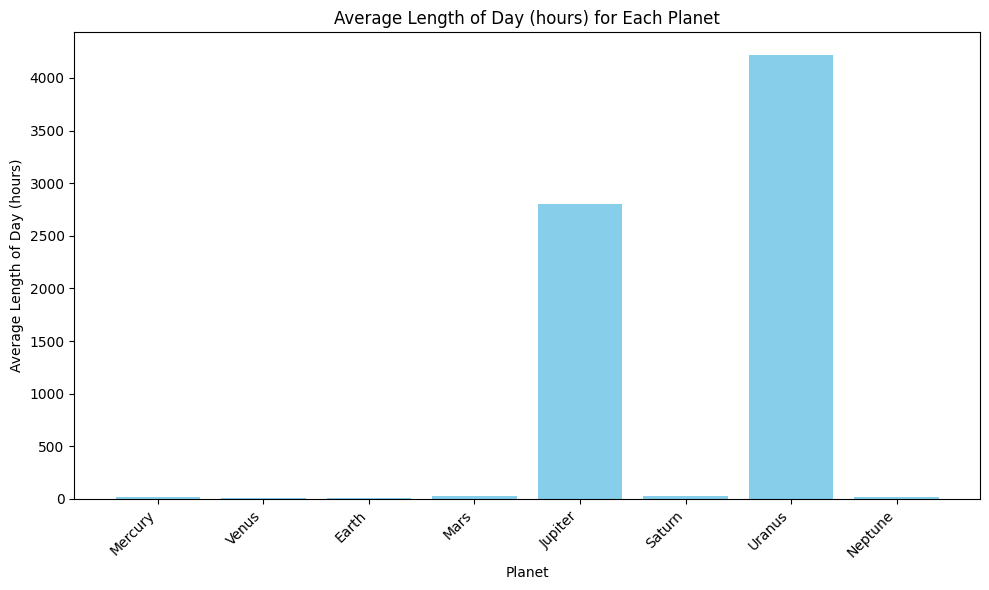

In [216]:
# Extract the planet names and average length of day (hours)
planet_names = df.select("Planet").rdd.flatMap(lambda x: x).collect()
avg_length_of_day = df.groupBy("Planet").avg("Length of Day (hours)").rdd.map(lambda x: x[1]).collect()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(planet_names, avg_length_of_day, color='skyblue')
plt.xlabel('Planet')
plt.ylabel('Average Length of Day (hours)')
plt.title('Average Length of Day (hours) for Each Planet')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Average rotation period per planet**

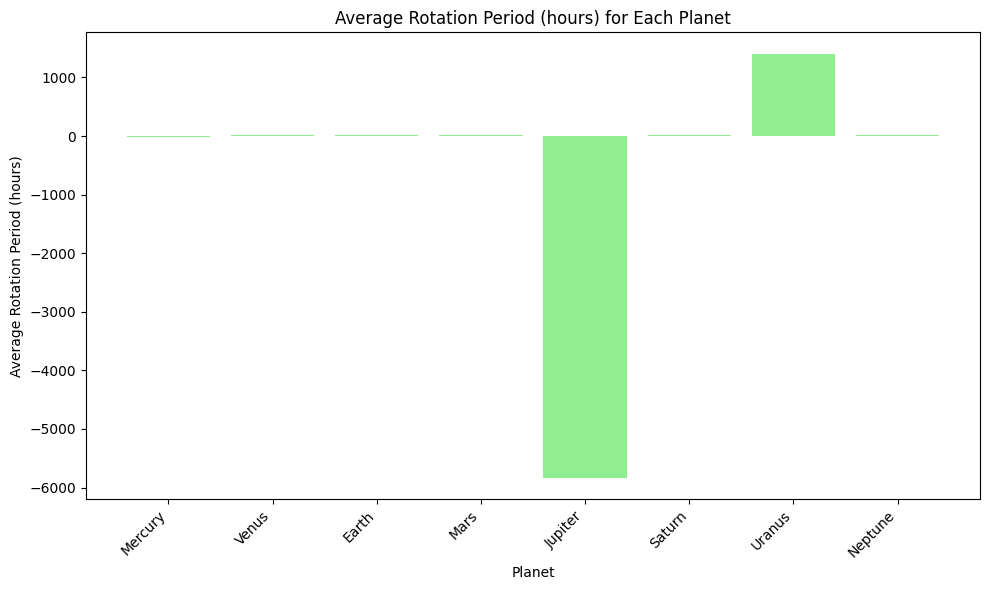

In [217]:
# Extract the planet names and average rotation period (hours)
avg_rotation_period = df.groupBy("Planet").avg("Rotation Period (hours)").rdd.map(lambda x: x[1]).collect()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(planet_names, avg_rotation_period, color='lightgreen')
plt.xlabel('Planet')
plt.ylabel('Average Rotation Period (hours)')
plt.title('Average Rotation Period (hours) for Each Planet')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Number of planets with or without rings**

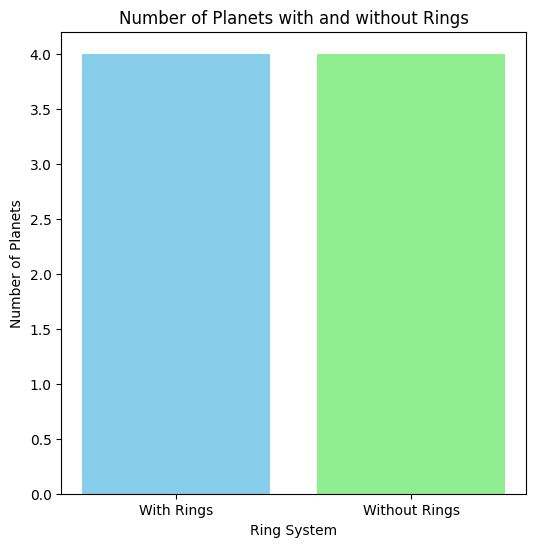

In [218]:
# Filter the DataFrame to include only the planets with rings
planets_with_rings = df.filter(df["Ring System?"] == "Yes")

# Count the number of planets with rings
num_planets_with_rings = planets_with_rings.count()

# Count the number of planets without rings
num_planets_without_rings = df.count() - num_planets_with_rings

# Create labels and values for the bar plot
labels = ['With Rings', 'Without Rings']
values = [num_planets_with_rings, num_planets_without_rings]

# Create the bar plot
plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.xlabel('Ring System')
plt.ylabel('Number of Planets')
plt.title('Number of Planets with and without Rings')
plt.show()

**Relationship between Diameter and Surface Gravity of Planets**

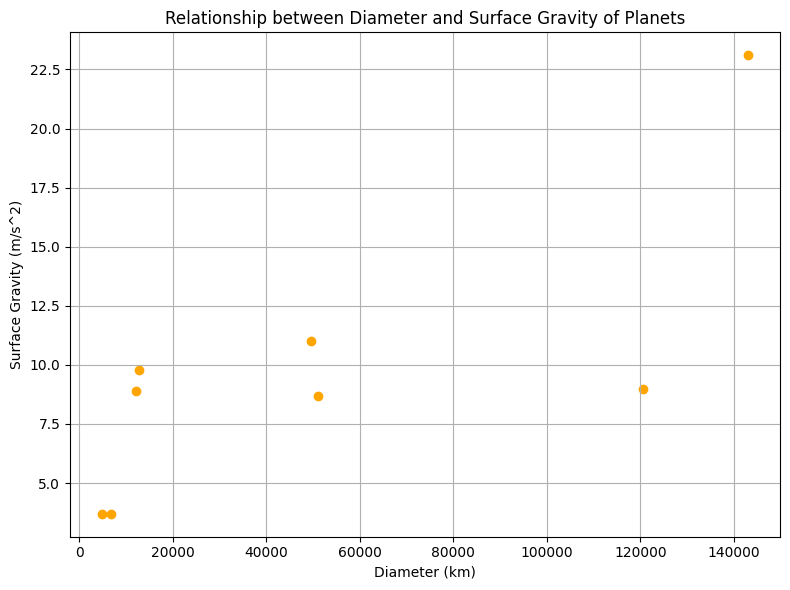

In [219]:
# Extract the surface gravity and diameter of the planets
surface_gravity = df.select("Planet", "Surface Gravity(m/s^2)").rdd.map(lambda x: x[1]).collect()
diameter = df.select("Planet", "Diameter (km)").rdd.map(lambda x: x[1]).collect()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(diameter, surface_gravity, color='orange')
plt.xlabel('Diameter (km)')
plt.ylabel('Surface Gravity (m/s^2)')
plt.title('Relationship between Diameter and Surface Gravity of Planets')
plt.grid(True)
plt.tight_layout()
plt.show()